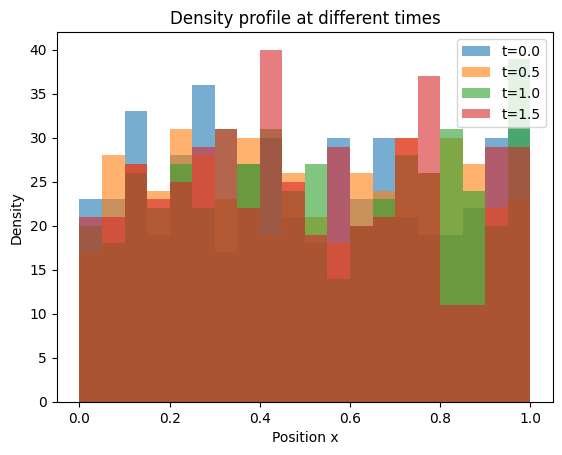

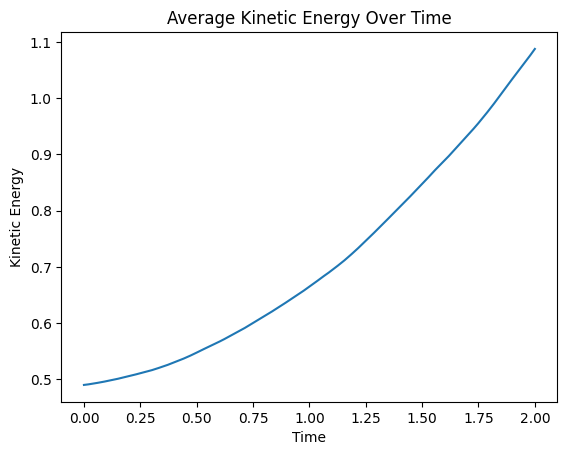

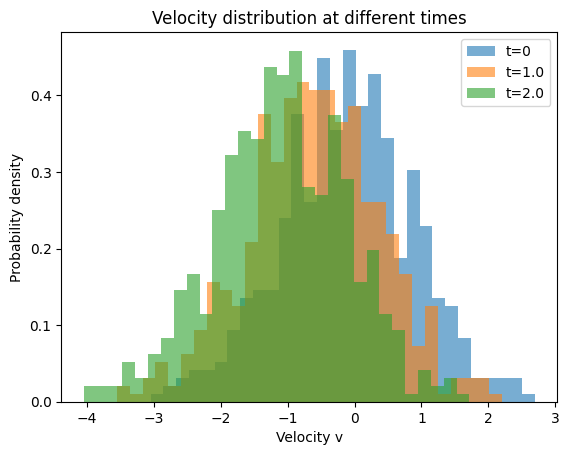

In [4]:
# Re-import and execute everything from scratch (e.g., after environment reset)
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
N = 500             # Number of particles
T = 2.0             # Total time
dt = 0.01           # Time step
steps = int(T / dt) # Number of time steps
mass = 1.0          # Particle mass (not used explicitly here)

# Initial conditions
np.random.seed(0)
x = np.random.uniform(0, 1, N)        # Positions: uniform in [0,1]
v = np.random.normal(0, 1, N)         # Velocities: Gaussian distribution

# External force field (simple harmonic: F = -x)
def force(x, v, t):
    return -x

# Record variables for analysis
x_record = []
v_record = []
energy_record = []

# Time evolution loop
for step in range(steps):
    t = step * dt
    F = force(x, v, t)
    v += F * dt          # Velocity update due to force
    x += v * dt          # Position update
    x = np.mod(x, 1.0)   # Periodic boundary conditions
    x_record.append(x.copy())
    v_record.append(v.copy())
    energy_record.append(0.5 * np.mean(v**2))  # Average kinetic energy

# Plot 1: Density profiles at different times
fig1, ax1 = plt.subplots()
time_indices = [0, steps//4, steps//2, 3*steps//4]
time_labels = [f"t={round(i * dt, 2)}" for i in time_indices]
for idx, label in zip(time_indices, time_labels):
    ax1.hist(x_record[idx], bins=20, range=(0, 1), alpha=0.6, label=label)
ax1.set_title("Density profile at different times")
ax1.set_xlabel("Position x")
ax1.set_ylabel("Density")
ax1.legend()
plt.show()

# Plot 2: Average kinetic energy over time
fig2, ax2 = plt.subplots()
ax2.plot(np.linspace(0, T, steps), energy_record)
ax2.set_title("Average Kinetic Energy Over Time")
ax2.set_xlabel("Time")
ax2.set_ylabel("Kinetic Energy")
plt.show()

# Plot 3: Velocity distributions at selected times
fig3, ax3 = plt.subplots()
velocity_indices = [0, steps//2, steps-1]
velocity_labels = ["t=0", "t=1.0", "t=2.0"]
for idx, label in zip(velocity_indices, velocity_labels):
    ax3.hist(v_record[idx], bins=30, density=True, alpha=0.6, label=label)
ax3.set_title("Velocity distribution at different times")
ax3.set_xlabel("Velocity v")
ax3.set_ylabel("Probability density")
ax3.legend()
plt.show()
